## Purpose

explore and model breast-cancer data from 1989-1991

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [2]:
input_data_path = '../../data/input/'
output_data_path = '../../data/output/'
working_data_path = '../../data/working/'

In [3]:
headers = ['id','clump','u_cel_size','u_cel_shape','m_adhesion','single_cell_size','bare_nuclei','bland_chromatin','n_nucleoli','mitosis','class']
raw_data = pd.read_csv('{}{}'.format(input_data_path,'breast-cancer-data.csv'), header = None, names = headers)
raw_data.to_csv('{}{}'.format(working_data_path,'breast-cancer-dataframe.csv'))
raw_data.head()

,id,clump,u_cel_size,u_cel_shape,m_adhesion,single_cell_size,bare_nuclei,bland_chromatin,n_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
def run_log_reg(dataframe, features, label = 'y', random_state = 1, test_size = 0.3):
    
    X = dataframe[features]
    y = dataframe[label]

    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = test_size, random_state = random_state)

    log_reg = LogisticRegression()
    log_reg.fit(X_train,y_train)

    y_pred = log_reg.predict(X_test)
    
    model_score = log_reg.score(X_test,y_test)

    model_fpr, model_tpr, model_thresh = roc_curve(y_test, log_reg.decision_function(X_test), pos_label = 1)
    model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
    model_roc = pd.DataFrame(model_roc)

    #sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

    model_auc = roc_auc_score(y_test, log_reg.decision_function(X_test))
    return model_score, model_roc, model_auc

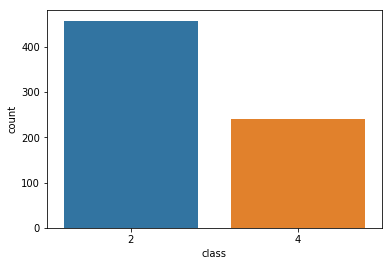

In [5]:
sns.countplot(x = 'class', data = raw_data)

In [6]:
t_data = raw_data
t_data.to_csv('{}{}'.format(working_data_path,'transformed'))
t_data.head()

,id,clump,u_cel_size,u_cel_shape,m_adhesion,single_cell_size,bare_nuclei,bland_chromatin,n_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
test = t_data['class'] == 4
test.astype(int)

t_data['y'] = test.astype(int)

t_data.to_csv('{}{}'.format(working_data_path,'transformed2'))

t_data.head()

,id,clump,u_cel_size,u_cel_shape,m_adhesion,single_cell_size,bare_nuclei,bland_chromatin,n_nucleoli,mitosis,class,y
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0


In [8]:
null = t_data.isnull()
null.describe()
# no nulls

,id,clump,u_cel_size,u_cel_shape,m_adhesion,single_cell_size,bare_nuclei,bland_chromatin,n_nucleoli,mitosis,class,y
count,699,699,699,699,699,699,699,699,699,699,699,699
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,699,699,699,699,699,699,699,699,699,699,699,699


In [9]:
# duplicates
not_dup = t_data.drop_duplicates()
not_dup.describe()
# lots of duplicates

,id,clump,u_cel_size,u_cel_shape,m_adhesion,single_cell_size,bland_chromatin,n_nucleoli,mitosis,class,y
count,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.435601,2.882779,1.593343,2.688857,0.344428
std,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,2.442345,3.066298,1.723129,0.951051,0.475526
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,0.000000
75%,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.000000


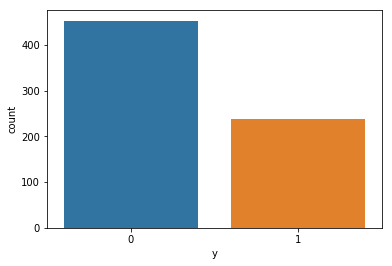

In [10]:
t_data = t_data.drop_duplicates()
t_data.to_csv('{}{}'.format(working_data_path,'transformed3'))
sns.countplot(x ='y', data = t_data)

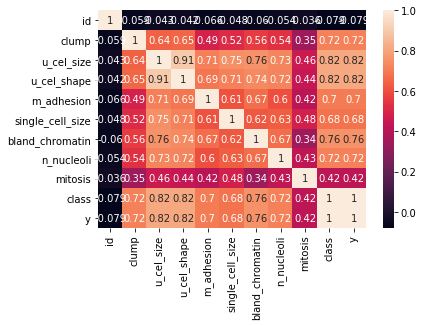

In [11]:
corr = t_data.corr()

corr.to_csv('{}{}'.format(output_data_path,'corr_heat_map'))

sns.heatmap(corr, annot = True)

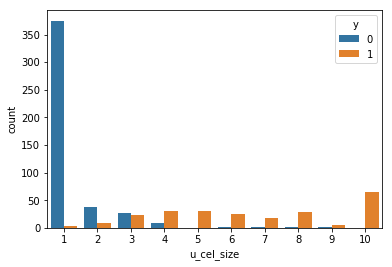

In [12]:
# u_cel_size and u_cel_shape seem to be correlated with y lets take a closer look with some graphs
sns.countplot(x = 'u_cel_size', data = t_data, hue = 'y')

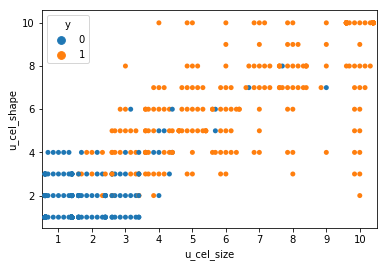

In [13]:
sns.swarmplot(x='u_cel_size', y = 'u_cel_shape', data = t_data, hue = 'y')

In [14]:
test = t_data[t_data.columns.difference(['y'])]
test.head()

,bare_nuclei,bland_chromatin,class,clump,id,m_adhesion,mitosis,n_nucleoli,single_cell_size,u_cel_shape,u_cel_size
0,1,3,2,5,1000025,1,1,1,2,1,1
1,10,3,2,5,1002945,5,1,2,7,4,4
2,2,3,2,3,1015425,1,1,1,2,1,1
3,4,3,2,6,1016277,1,1,7,3,8,8
4,1,3,2,4,1017023,3,1,1,2,1,1


In [15]:
# there is really good decision boundry for logistic regression
# but obviosly there will be a few false positives and negatives
# lets create a baseline with logistic regression
X = t_data[['u_cel_size', 'u_cel_shape']]
y = t_data['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred = log_reg.predict(X_test)
model_score = log_reg.score(X_test,y_test)
model_score

0.9615384615384616

array([[136,   4],
       [  4,  64]])

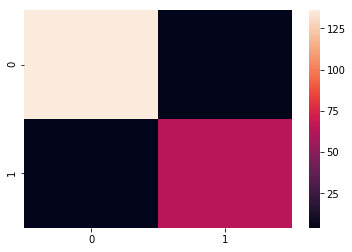

In [18]:
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat)
con_mat

In [19]:
model_report = classification_report(y_test,y_pred,target_names = ['benign','malignant'])
print(model_report)

             precision    recall  f1-score   support

     benign       0.97      0.97      0.97       140
  malignant       0.94      0.94      0.94        68

avg / total       0.96      0.96      0.96       208



In [20]:
model_fpr, model_tpr, model_thresh = roc_curve(y_test, log_reg.decision_function(X_test), pos_label = 1)
model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
model_roc = pd.DataFrame(model_roc)
model_roc.head()

,fpr,thresh,tpr
0,0.0,9.372794,0.235294
1,0.0,8.604717,0.250000
2,0.0,8.097162,0.279412
3,0.0,7.329085,0.308824
4,0.0,6.821530,0.338235


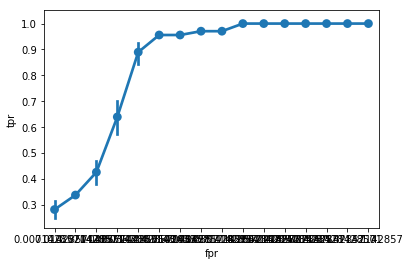

In [21]:
sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

In [22]:
model_auc = roc_auc_score(y_test, log_reg.decision_function(X_test))
model_auc1 = auc(model_roc['fpr'], model_roc['tpr'])
print(model_auc, model_auc1)

0.9838235294117648 0.9838235294117648


## Results and Thoughts

The first run was really simple and logistic regression performed well.

We should dig deeper to see what caused type 1 / type 2 errors

## Second Run

In [23]:
results1 = pd.DataFrame(y_test, columns = ['y'])
results1['y_pred'] = y_pred
results1['failed'] = results1['y'] != results1['y_pred']
results1.head()


,y,y_pred,failed
0,0,0,False
1,0,0,False
2,0,0,False
3,1,1,False
4,1,0,True


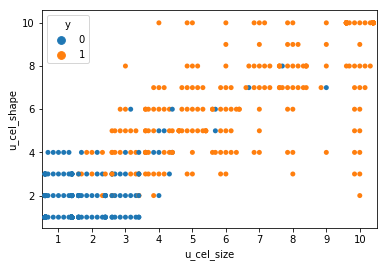

In [24]:
sns.swarmplot(x='u_cel_size', y = 'u_cel_shape', data = t_data, hue = 'y')

/home/nathaniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nathaniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/nathaniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,id,clump,u_cel_size,u_cel_shape,m_adhesion,single_cell_size,bare_nuclei,bland_chromatin,n_nucleoli,mitosis,class,y,outliers1,outliers2,outliers
1,1002945,5,4,4,5,7,10,3,2,1,2,0,1,0,1
3,1016277,6,8,8,1,3,4,3,7,1,2,0,1,0,1
12,1041801,5,3,3,3,2,3,4,4,1,4,1,0,1,1
20,1054590,7,3,2,10,5,10,5,4,4,4,1,0,1,1
25,1065726,5,2,3,4,2,7,3,6,1,4,1,0,1,1


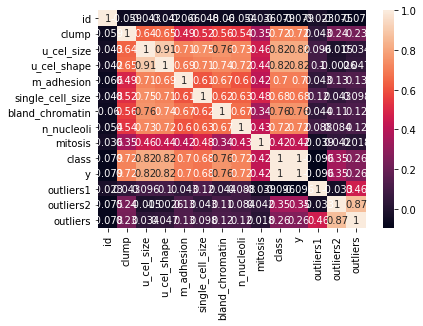

In [25]:
outliers1 = (t_data['u_cel_size'] >= 4) & (t_data['u_cel_shape'] >= 4) & (t_data['y'] == 0)
outliers2 = (t_data['u_cel_size'] <= 4) & (t_data['u_cel_shape'] <= 4) & (t_data['y'] == 1)
t_data['outliers1'] = outliers1.astype(int)
t_data['outliers2'] = outliers2.astype(int)

t_data['outliers'] = t_data['outliers1'] | t_data['outliers2']


outliers1 = t_data[t_data['outliers'] == 1]

outliers_corr = t_data.corr()

sns.heatmap(outliers_corr, annot = True)
t_data.head()

outliers_df = t_data[t_data['outliers'] == 1]
outliers_df.head()

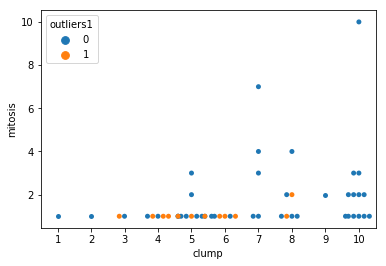

In [26]:
sns.swarmplot(x = 'clump', y = 'mitosis', hue = 'outliers1', data = outliers_df)

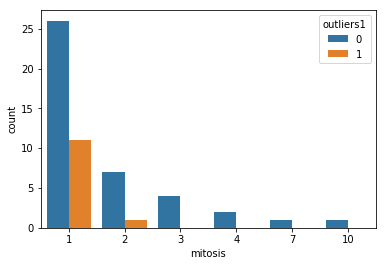

In [27]:
sns.countplot(x = 'mitosis', data = outliers_df, hue = 'outliers1')

In [28]:
# mitosis appears to be a good sperator for the outliers. That is we only find type 2 outliers with mitosis > 3
# so lets build a feature with mitosis > 3 plus booleans for outlier2
t_data['mitosis3'] = (t_data['mitosis'] >= 3).astype(int)
t_data.head()

/home/nathaniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,clump,u_cel_size,u_cel_shape,m_adhesion,single_cell_size,bare_nuclei,bland_chromatin,n_nucleoli,mitosis,class,y,outliers1,outliers2,outliers,mitosis3
0,1000025,5,1,1,1,2,1,3,1,1,2,0,0,0,0,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0,1,0,1,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0,0,0,0,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0,1,0,1,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0,0,0,0,0


test new model with outliers1 outliers2 and mitosis3

0.9826680672268907 0.9826680672268907


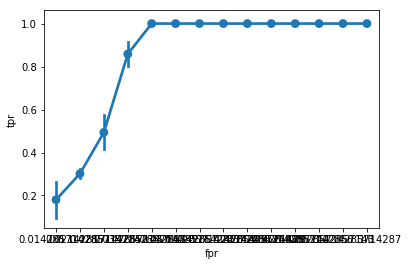

In [29]:
X = t_data[['u_cel_size', 'u_cel_shape', 'outliers', 'mitosis3']]
y = t_data['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)
model_score = log_reg.score(X_test,y_test)

model_fpr, model_tpr, model_thresh = roc_curve(y_test, log_reg.decision_function(X_test), pos_label = 1)
model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
model_roc = pd.DataFrame(model_roc)
model_roc.head()

sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

model_auc = roc_auc_score(y_test, log_reg.decision_function(X_test))
model_auc1 = auc(model_roc['fpr'], model_roc['tpr'])
print(model_auc, model_auc1)

## Results and Thoughts 2

My AUC score got worse from 98.3 --> 98.2.

These features didn't seem to do much

mitosis is not strongly correlated to y ...

## Round 3

lets add in more columns to see how things go

0.9865546218487394 0.9865546218487394 0.9711538461538461


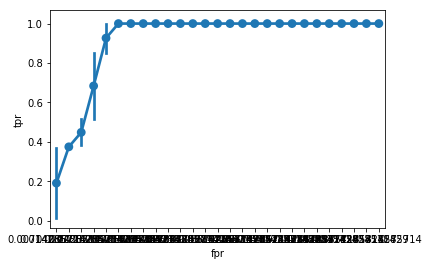

In [30]:
X = t_data[['u_cel_size', 'u_cel_shape', 'outliers', 'mitosis3','clump', 'bland_chromatin', 'n_nucleoli']]
y = t_data['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)
model_score = log_reg.score(X_test,y_test)

model_fpr, model_tpr, model_thresh = roc_curve(y_test, log_reg.decision_function(X_test), pos_label = 1)
model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
model_roc = pd.DataFrame(model_roc)
model_roc.head()

sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

model_auc = roc_auc_score(y_test, log_reg.decision_function(X_test))
model_auc1 = auc(model_roc['fpr'], model_roc['tpr'])
print(model_auc, model_auc1, model_score)

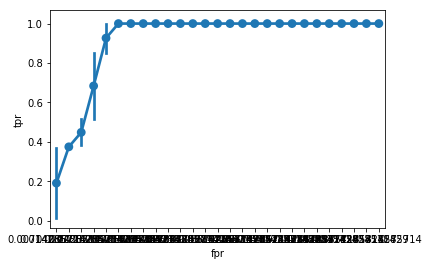

In [33]:
features = ['u_cel_size', 'u_cel_shape', 'outliers', 'mitosis3','clump', 'bland_chromatin', 'n_nucleoli']
score, conf_df, auc = run_log_reg(t_data, features)

sns.pointplot(x = 'fpr', y = 'tpr', data = conf_df)

TypeError: 'numpy.float64' object is not callable

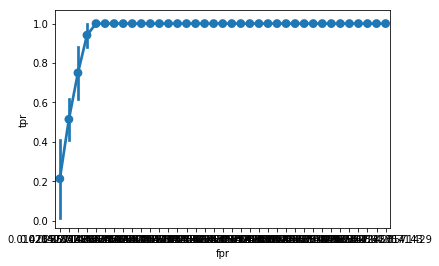

In [32]:
X = t_data[['u_cel_size', 'u_cel_shape', 'outliers', 'mitosis3','clump', 'bland_chromatin', 'n_nucleoli', 'm_adhesion','single_cell_size']]
y = t_data['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)
model_score = log_reg.score(X_test,y_test)

model_fpr, model_tpr, model_thresh = roc_curve(y_test, log_reg.decision_function(X_test), pos_label = 1)
model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
model_roc = pd.DataFrame(model_roc)
model_roc.head()

sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

model_auc = roc_auc_score(y_test, log_reg.decision_function(X_test))
model_auc1 = auc(model_roc['fpr'], model_roc['tpr'])
print(model_auc, model_auc1, model_score)

In [ ]:
X = t_data[['u_cel_size', 'u_cel_shape','clump', 'bland_chromatin', 'n_nucleoli','m_adhesion','single_cell_size']]
y = t_data['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)
model_score = log_reg.score(X_test,y_test)

model_fpr, model_tpr, model_thresh = roc_curve(y_test, log_reg.decision_function(X_test), pos_label = 1)
model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
model_roc = pd.DataFrame(model_roc)
model_roc.head()

sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

model_auc = roc_auc_score(y_test, log_reg.decision_function(X_test))
model_auc1 = auc(model_roc['fpr'], model_roc['tpr'])
print(model_auc, model_auc1, model_score)

In [ ]:
X = t_data[['u_cel_size', 'u_cel_shape','clump', 'bland_chromatin', 'n_nucleoli','m_adhesion','single_cell_size']]
y = t_data['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 10)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)
model_score = log_reg.score(X_test,y_test)

model_fpr, model_tpr, model_thresh = roc_curve(y_test, log_reg.decision_function(X_test), pos_label = 1)
model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
model_roc = pd.DataFrame(model_roc)
model_roc.head()

sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

model_auc = roc_auc_score(y_test, log_reg.decision_function(X_test))
model_auc1 = auc(model_roc['fpr'], model_roc['tpr'])
print(model_auc, model_auc1, model_score)

In [ ]:
#plot feature importances
log_reg.coef_[0]

sns.barplot(x = ['u_cel_size', 'u_cel_shape','clump', 'bland_chromatin', 'n_nucleoli','m_adhesion','single_cell_size'], y = log_reg.coef_[0])
plt.xticks(rotation=-45)

## Results and Thoughts 3

The data was already pretty clean there wasn't much reason to create more features as the features which existed were sufficient to get really good results

we should look into cross validation now or maybe consider a different model

## Round 4

We will attempt to find a better model and if there's time cross validate to tune hyperparameters

In [ ]:
#SVC with RBF kernal
X = t_data[['u_cel_size', 'u_cel_shape','clump', 'bland_chromatin', 'n_nucleoli','m_adhesion','single_cell_size']]
y = t_data['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

svc_clf = SVC()
svc_clf.fit(X_train,y_train)

y_pred = svc_clf.predict(X_test)
model_score = svc_clf.score(X_test,y_test)

model_fpr, model_tpr, model_thresh = roc_curve(y_test, svc_clf.decision_function(X_test), pos_label = 1)
model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
model_roc = pd.DataFrame(model_roc)

sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

model_auc = roc_auc_score(y_test, svc_clf.decision_function(X_test))
model_auc1 = auc(model_roc['fpr'], model_roc['tpr'])
print(model_auc, model_auc1, model_score)

In [ ]:
#SVC with linear kernal
X = t_data[['u_cel_size', 'u_cel_shape','clump', 'bland_chromatin', 'n_nucleoli','m_adhesion','single_cell_size']]
y = t_data['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

svc_clf = SVC(kernel = 'linear')
svc_clf.fit(X_train,y_train)

y_pred = svc_clf.predict(X_test)
model_score = svc_clf.score(X_test,y_test)

model_fpr, model_tpr, model_thresh = roc_curve(y_test, svc_clf.decision_function(X_test), pos_label = 1)
model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
model_roc = pd.DataFrame(model_roc)

sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

model_auc = roc_auc_score(y_test, svc_clf.decision_function(X_test))
model_auc1 = auc(model_roc['fpr'], model_roc['tpr'])
print(model_auc, model_auc1, model_score)

In [ ]:
#SVC with poly kernal degree 3
X = t_data[['u_cel_size', 'u_cel_shape','clump', 'bland_chromatin', 'n_nucleoli','m_adhesion','single_cell_size']]
y = t_data['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

svc_clf = SVC(kernel = 'poly')
svc_clf.fit(X_train,y_train)

y_pred = svc_clf.predict(X_test)
model_score = svc_clf.score(X_test,y_test)

model_fpr, model_tpr, model_thresh = roc_curve(y_test, svc_clf.decision_function(X_test), pos_label = 1)
model_roc = {'fpr':model_fpr, 'tpr':model_tpr, 'thresh':model_thresh}
model_roc = pd.DataFrame(model_roc)

sns.pointplot(x = 'fpr', y = 'tpr', data = model_roc)

model_auc = roc_auc_score(y_test, svc_clf.decision_function(X_test))
model_auc1 = auc(model_roc['fpr'], model_roc['tpr'])
print(model_auc, model_auc1, model_score)